# PROJECT BASED CLO 2 KELOMPOK 8


1.  Aqilah Fedura Ilahi (1301213123)
2.  Muhammad Danu Firjatullah Rachman(1301213439)
3.  Risna Zahira (1301213160)


**METODE : CNN**


# LATANG BELAKANG

Analisis data, atau data analytics, merupakan tahap penting dalam mengumpulkan, merapikan, dan mengekstraksi informasi yang bernilai dari dataset yang besar. Dalam proses analisis ini, dapat diidentifikasi pola dan metrik yang mungkin tidak terlihat secara langsung dalam data mentah. Informasi ini kemudian bisa dimanfaatkan untuk meng-enhance atau meningkatkan proses, sehingga meningkatkan efisiensi sistem secara keseluruhan.

Data yang kami gunakan adalah Student Performance yang Memprediksi Kinerja Siswa pada Pendidikan Menengah Atas (SMA).

Pemilihan data ini didasarkan pada konteks pemahaman dan analisis kinerja siswa pada tingkat pendidikan menengah di dua sekolah Portugis. Data ini mencakup berbagai atribut, termasuk nilai siswa, demografi, fitur sosial, dan atribut sekolah. Penggunaan data ini merupakan praktek yang signifikan dalam pemodelan klasifikasi dan regresi biner/lima tingkat, yang mencerminkan tantangan dunia nyata dalam pemahaman kinerja siswa. Atribut target G3 memiliki korelasi yang kuat dengan atribut G2 dan G1 karena G3 mencerminkan nilai akhir tahun, yang secara alami bergantung pada prestasi awal siswa di periode ke-1 dan ke-2. Data ini menawarkan kesempatan untuk memprediksi kinerja siswa di masa depan, menggabungkan atribut G2 dan G1, dan dapat memiliki dampak yang signifikan dalam meningkatkan pendidikan dan memberikan wawasan berharga bagi pembuat kebijakan dan lembaga pendidikan.





**The Data we have consists of 649 Entry and 33 Columns, Most of the columns are catagorical of ordinal variables, More information taken from dataset link**

Columns:
* School: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* Sex: student's sex (binary: 'F' - female or 'M' - male)
* Age: student's age (numeric: from 15 to 22)
* Address: student's home address type (binary: 'U' - urban or 'R' - rural)
* Famsize: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* Fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* Mjob: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Reason: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* Guardian: student's guardian (nominal: 'mother', 'father' or 'other')
* Traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* Studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* Failures: number of past class failures (numeric: n if 1<=n<3, else 4)
* Schoolsup: extra educational support (binary: yes or no)
* Famsup: family educational support (binary: yes or no)
* Paid: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* Activities: extra-curricular activities (binary: yes or no)
* Nursery: attended nursery school (binary: yes or no)
* Higher: wants to take higher education (binary: yes or no)
* Internet: Internet access at home (binary: yes or no)
* Romantic: with a romantic relationship (binary: yes or no)
* Famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* Freetime: free time after school (numeric: from 1 - very low to 5 - very high)
* Goout: going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Health: current health status (numeric: from 1 - very bad to 5 - very good)
* Absences: number of school absences (numeric: from 0 to 93)
* G1: first period grade (numeric: from 0 to 20)
* G2: second period grade (numeric: from 0 to 20)
* G3: final grade (numeric: from 0 to 20, output target)

# Ringkasan Metode
Metode yang akan digunakan pada project ini yaitu Convolutional Neural Network atau CNN sebagai baseline model. Kami melakukan ekplorasi model dengan penambahan lebih banyak lapisan Conv1D, penggunakan kernel size yang lebih besar, dan penambahkan lebih banyak neuron di lapisan Dense Exploratory modelnya.

Sehingga didapatkan hasil akhir perbandingan MSE dan MAE, lalu didapatkan performa model terbaik dari 3 model yang dikembangkan.




# 1. Data Preprocessing dan Eksplorasi Data
a. Impor pustaka yang dibutuhkan

In [1]:
#import pustaka yang diperlukan
import numpy as np
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam


b. Memuat dataset

In [2]:
# Unduh dataset dari URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
download_path = "student.zip"

# Unduh file ZIP
if not os.path.exists(download_path):
    import urllib.request
    urllib.request.urlretrieve(url, download_path)

# Ekstrak file yang diperlukan
with zipfile.ZipFile(download_path, 'r') as zip_ref:
    zip_ref.extractall("student_data")

# Baca data matematika
df_math = pd.read_csv("student_data/student-mat.csv", sep=';')

# Baca data portugis
df_port = pd.read_csv("student_data/student-por.csv", sep=';')

# Gabungkan kedua data menjadi satu dataset
df = pd.concat([df_math, df_port], axis=0)



c. Eksplorasi Data Awal

In [3]:
# Menyatakan jumlah baris dan kolom
df.shape

(1044, 33)

In [4]:
# Menyatakan daftar kolom
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
# Menampilkan 5 baris pertama
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# Mendapatkan nilai unik dari kolom 'G3'
df['G3'].unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4,  1])

In [7]:
# Mendapatkan tipe data dari setiap kolom
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
# Menghitung jumlah sel non-NA (tidak null) untuk setiap kolom atau baris.
df.count()

school        1044
sex           1044
age           1044
address       1044
famsize       1044
Pstatus       1044
Medu          1044
Fedu          1044
Mjob          1044
Fjob          1044
reason        1044
guardian      1044
traveltime    1044
studytime     1044
failures      1044
schoolsup     1044
famsup        1044
paid          1044
activities    1044
nursery       1044
higher        1044
internet      1044
romantic      1044
famrel        1044
freetime      1044
goout         1044
Dalc          1044
Walc          1044
health        1044
absences      1044
G1            1044
G2            1044
G3            1044
dtype: int64

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
#menampilkan data shape dan info data
print('Data Shape:',df.shape)
print(df.info())
display(df.head())

Data Shape: (1044, 33)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
#menampikan unique value dari categorical columns
print('Catagorical Column\'s Values\n')
for col in df.select_dtypes(exclude=np.number).columns:
    unique = df[col].unique()
    print('-'*7,f'columns {col}','-'*7)
    print(f'There are {len(unique)} Unique values')
    print(f'5 of which are: {unique[:5]}\n')

Catagorical Column's Values

------- columns school -------
There are 2 Unique values
5 of which are: ['GP' 'MS']

------- columns sex -------
There are 2 Unique values
5 of which are: ['F' 'M']

------- columns address -------
There are 2 Unique values
5 of which are: ['U' 'R']

------- columns famsize -------
There are 2 Unique values
5 of which are: ['GT3' 'LE3']

------- columns Pstatus -------
There are 2 Unique values
5 of which are: ['A' 'T']

------- columns Mjob -------
There are 5 Unique values
5 of which are: ['at_home' 'health' 'other' 'services' 'teacher']

------- columns Fjob -------
There are 5 Unique values
5 of which are: ['teacher' 'other' 'services' 'health' 'at_home']

------- columns reason -------
There are 4 Unique values
5 of which are: ['course' 'other' 'home' 'reputation']

------- columns guardian -------
There are 3 Unique values
5 of which are: ['mother' 'father' 'other']

------- columns schoolsup -------
There are 2 Unique values
5 of which are: ['yes' '

In [12]:
# Mengubah kategori menjadi angka dengan LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalisasi data numerik
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


d. Visualisasi Data





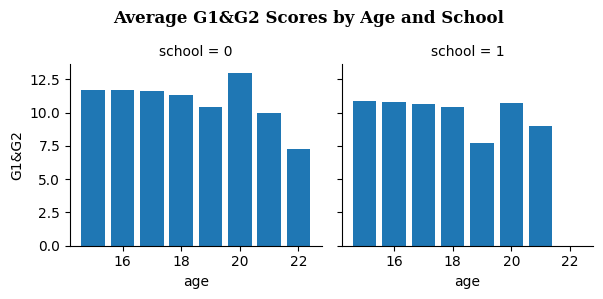

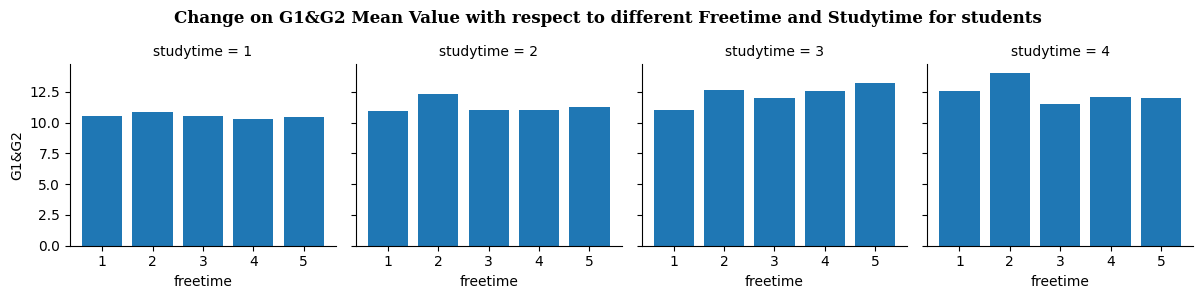

In [13]:
# Membuat salinan dari dataframe utama untuk melakukan penyesuaian
mu_df = df.copy()
mu_df['G1&G2'] = round((mu_df['G1'] + mu_df['G2']) / 2, 1)
mu_df['MFedu'] = mu_df['Medu'] + mu_df['Fedu']

mu_df.drop(labels=['G1', 'G2', 'Medu', 'Fedu'], inplace=True, axis=1)

# Memperbarui daftar kolom setelah penyesuaian
mu_cat_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                  'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
mu_num_columns = ['traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'MFedu']
mu_cont_columns = ['age', 'failures', 'absences', 'G3']

def exam_mean_facetgrid(df, face_column, x_col, mean_col='G1&G2', title='Forgotten!!'):
    plot_data = df.groupby([x_col, face_column]).mean()[mean_col].reset_index()
    g = sns.FacetGrid(data=plot_data, col=face_column, margin_titles=True)
    g.map(plt.bar, x_col, mean_col)
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'{title}', size=12, fontweight='bold', fontfamily='serif')

exam_mean_facetgrid(mu_df, 'school', 'age', title='Average G1&G2 Scores by Age and School')

exam_mean_facetgrid(df=mu_df, face_column='studytime', x_col='freetime', mean_col='G1&G2', title='Change on G1&G2 Mean Value with respect to different Freetime and Studytime for students')



Visualisasi data dengan metode **Bivariat Data Visualization**

Pada bagian ini tujuannya adalah mengeksplorasi hubungan 2 kolom satu sama lain, fokus utama kita adalah hasil ujian jadi disini akan lebih fokus pada hubungan kolom yang berbeda dengan hasil ujian,
demi kesederhanaan, akan diggabungkan G1 dan G2 menjadi satu kolom sehingga kita dapat menjelajahi hubungan antara kolom dan kedua ujian secara bersamaan

Disini juga akan ditambahkan tingkat Pendidikan Ayah dan Ibu ke dalam satu kolom

In [14]:
#Creating different copy of the main dataframe to do my adjustment on it.
bi_df = df.copy()
bi_df['G1&G2'] = round((bi_df['G1'] + bi_df['G2'])/2,1)
bi_df['MFedu'] = bi_df['Medu'] + bi_df['Fedu']

bi_df.drop(labels=['G1','G2','Medu','Fedu'],inplace=True,axis=1)

#Updating my list of columns after the adjustments
bi_cat_columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
               'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
bi_num_columns = ['traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health','MFedu']
bi_cont_columns = ['age','failures','absences','G3']

Pertama, akan dipelajari distribusi skor G1 & G2 untuk kolom yang berbeda

<ipython-input-15-c8b3bdc491b4>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='G1&G2',data=bi_df,hue=col,ax=ax,shade=True,palette=sns.color_palette('bright')[:len(bi_df[col].unique())])
<ipython-input-15-c8b3bdc491b4>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='G1&G2',data=bi_df,hue=col,ax=ax,shade=True,palette=sns.color_palette('bright')[:len(bi_df[col].unique())])
<ipython-input-15-c8b3bdc491b4>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='G1&G2',data=bi_df,hue=col,ax=ax,shade=True,palette=sns.color_palette('bright')[:len(bi_df[col].unique())])
<ipython-input-15-c8b3bdc491b4>:11: FutureWarning: 


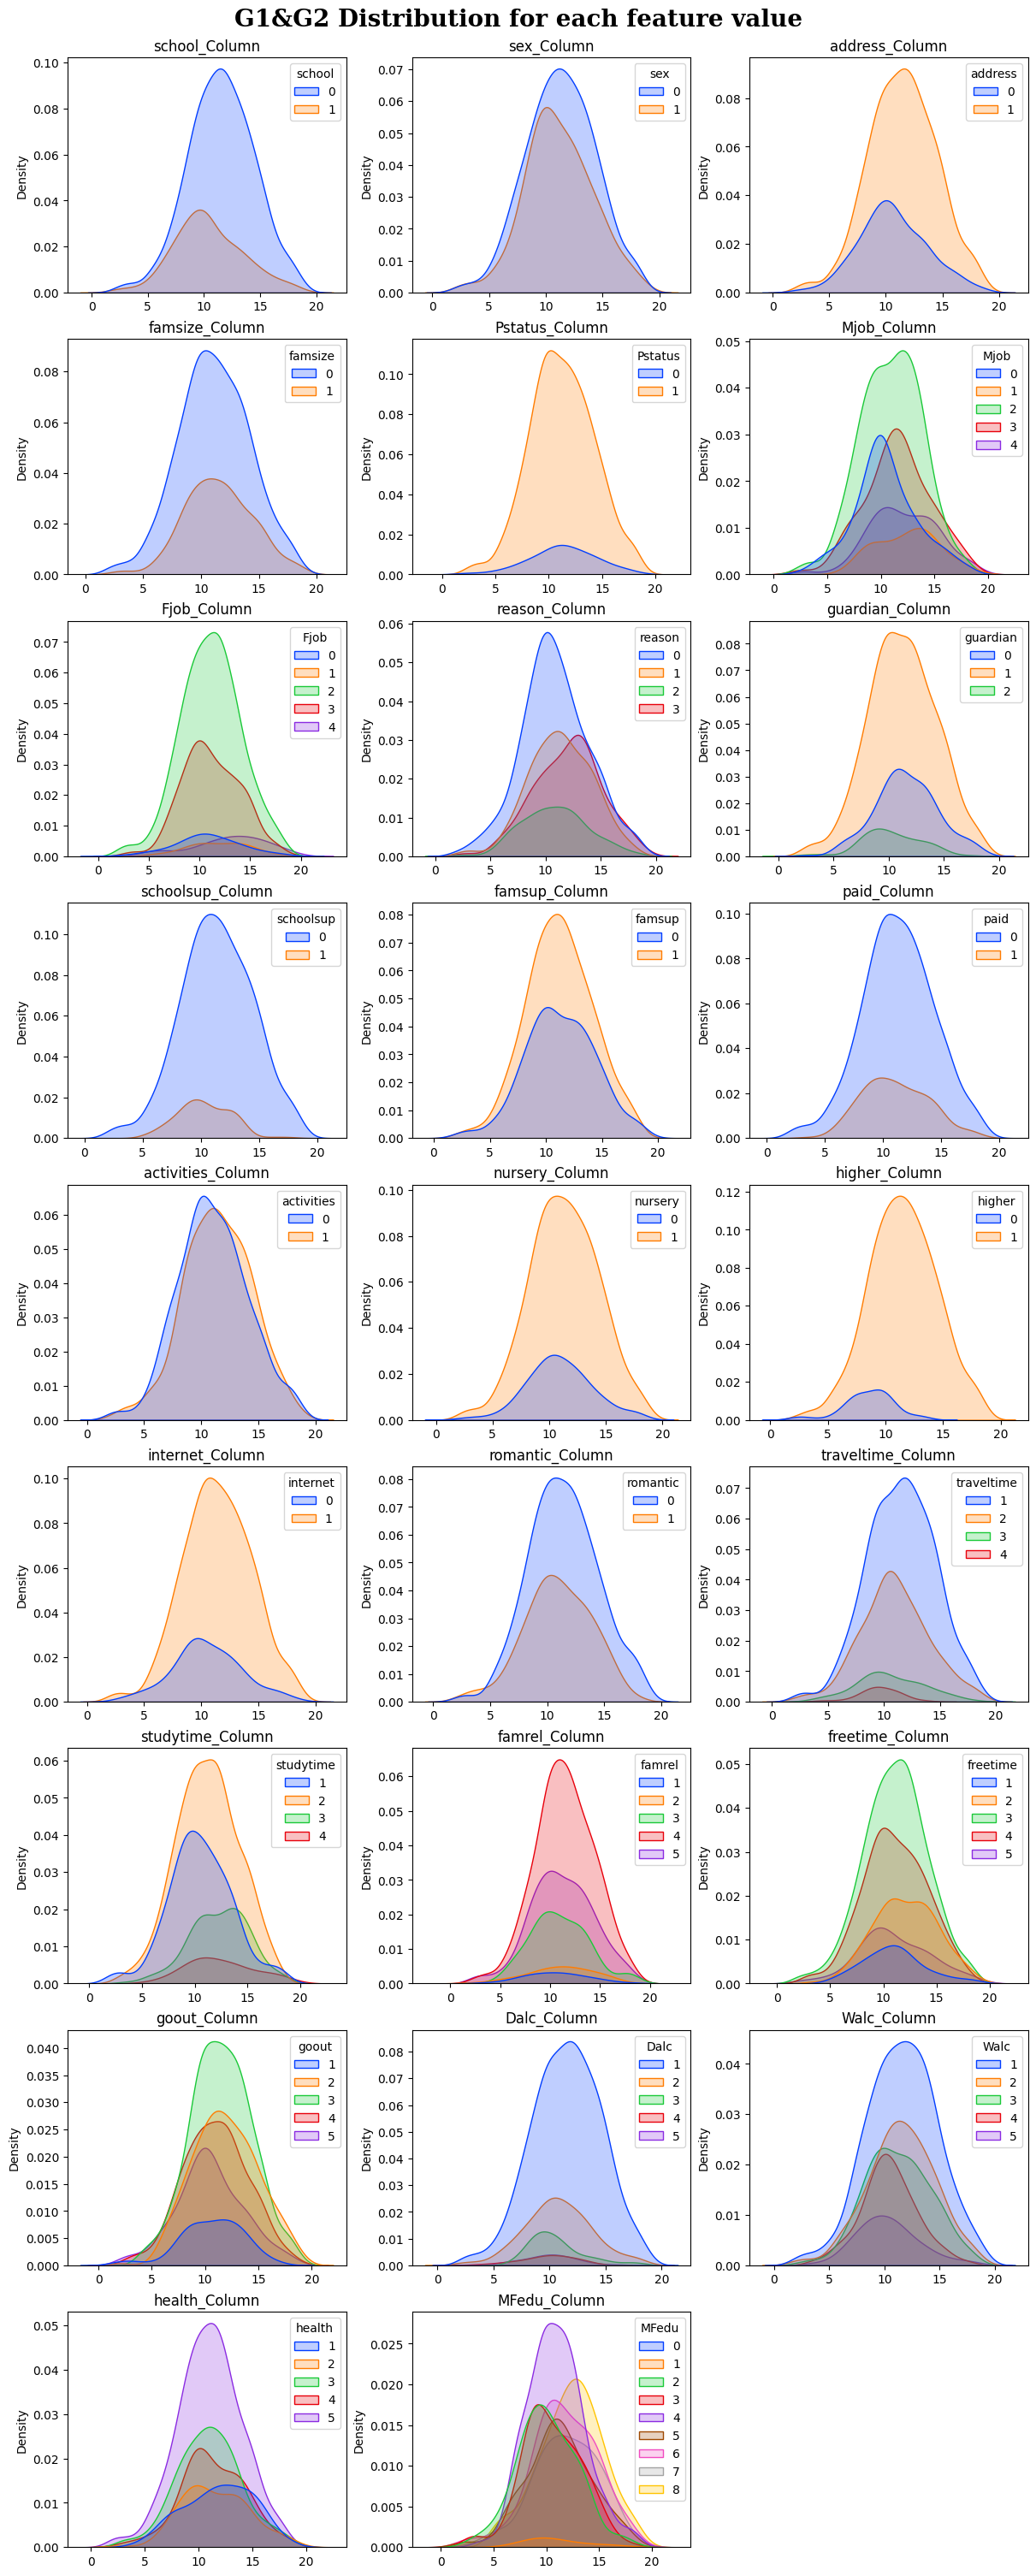

In [15]:
fig,axes = plt.subplots(9,3,figsize=(12,30),constrained_layout=True)
fig.suptitle('G1&G2 Distribution for each feature value',size=20, fontweight='bold', fontfamily='serif')
axes=axes.ravel()
axes[-1].remove()#removing non plotted axis

for i in range(len(bi_cat_columns+bi_num_columns)):
    #Creating plotting data variables
    ax = axes[i]
    col = (bi_cat_columns+bi_num_columns)[i]
    #plotting function
    sns.kdeplot(x='G1&G2',data=bi_df,hue=col,ax=ax,shade=True,palette=sns.color_palette('bright')[:len(bi_df[col].unique())])
    #Adjusting plot
    ax.set_xlabel("")
    ax.set_title(col+'_Column')

Lalu membandingkan rata-rata nilai ujian untuk setiap kolom

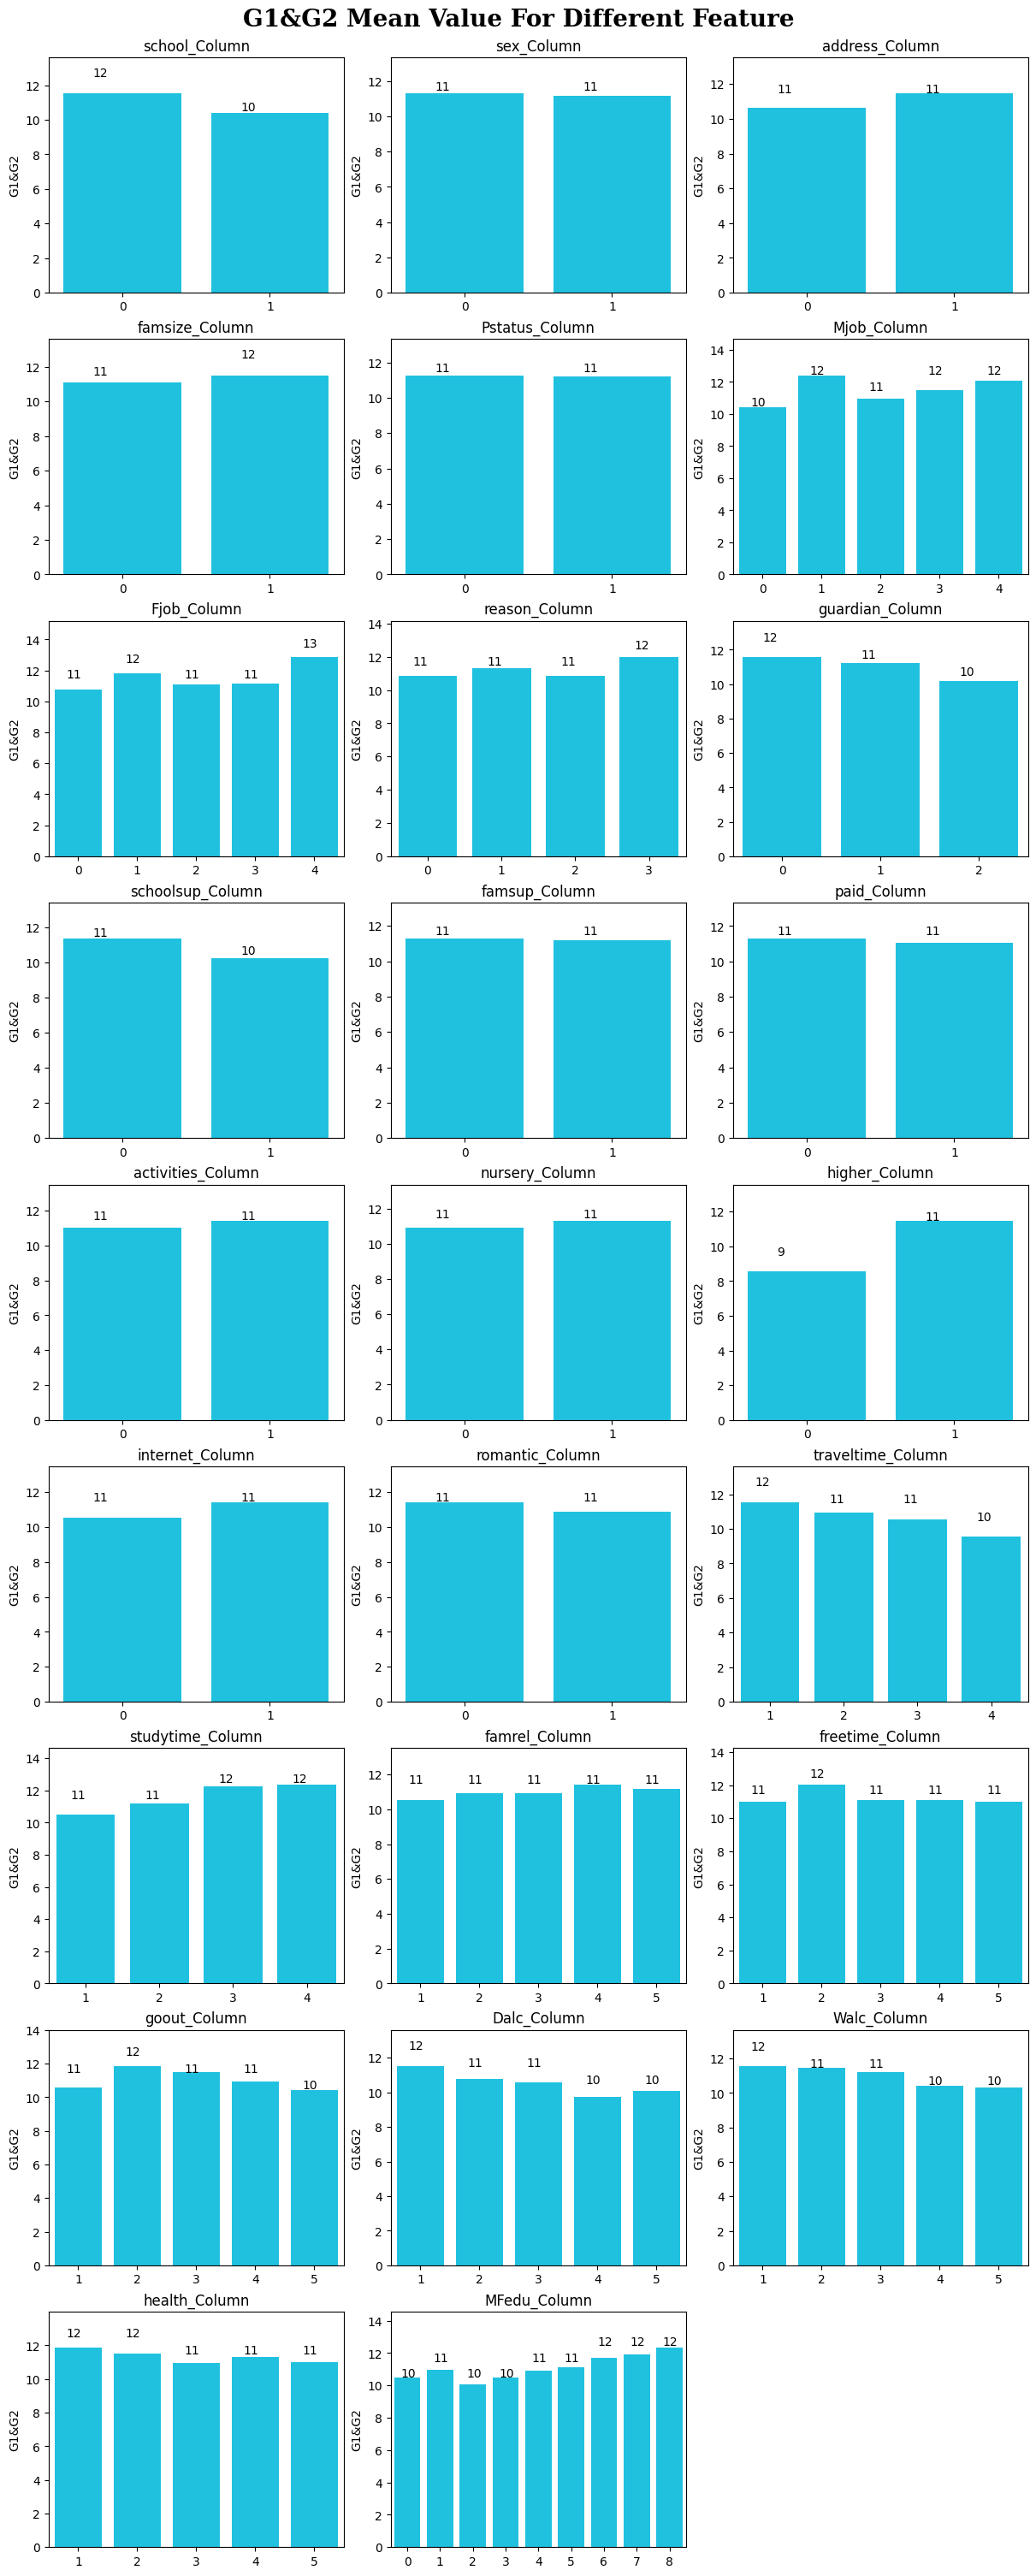

In [16]:
fig,axes = plt.subplots(9,3,figsize=(12,30),constrained_layout=True)
fig.suptitle('G1&G2 Mean Value For Different Feature',size=20, fontweight='bold', fontfamily='serif')
axes=axes.ravel()
axes[-1].remove()
for i in range(len(bi_cat_columns+bi_num_columns)):
    #Creating plotting data variables
    ax = axes[i]
    col = (bi_cat_columns+bi_num_columns)[i]
    plot_data = bi_df.groupby(col).mean()
    #plotting function
    sns.barplot(y='G1&G2', x=plot_data.index, data=plot_data, ax=ax, color=sns.color_palette('bright')[9])
    #Adjusting plot
    ax.set_xlabel("")
    ax.set_title(col+'_Column')
    ax.set_ylim(0,max(ax.get_ylim())+max(ax.get_ylim())/8)
    #writing percentage over each bar
    for p in ax.patches:
        x = p.get_x()+0.2
        y = round(p.get_height())
        ax.annotate(y,(x,y+0.5))

Ada beberapa perbedaan distribusi yang dapat kita lihat dari distribusi nilai ujian, misalnya:
- Nilai rata-rata ujian tampaknya memiliki hubungan terbalik dengan konsumsi alkohol
- Nilai rata-rata ujian meningkat seiring bertambahnya waktu belajar dan distribusi nilai cenderung sedikit bergeser ke kanan
- Nilai rata-rata ujian meningkat dibandingkan siswa lain jika Ibu Ayah berprofesi sebagai guru dan distribusi nilai cenderung sedikit bergeser ke kanan
- Distribusi kesehatan bergeser ke kiri (skor menurun) jika kesehatan siswa memburuk
- Nilai rata-rata ujian paling buruk jika wali siswa selain ayah atau ibu, ada beberapa perbedaan antara wali sebagai ayah dan ibu, namun entri ayah sebagai wali secara signifikan lebih kecil daripada ibu karena sebagian besar siswa mempunyai entri tersebut. ibu sebagai wali

# matriks confussion

Korelasi yang paling tinggi adalah korelasi antara G2 dan G3, yaitu 0.91. Korelasi ini menunjukkan bahwa nilai G2 dan G3 sangat berkorelasi satu sama lain. Dengan kata lain, nilai G2 dapat digunakan untuk memprediksi nilai G3 dengan cukup akurat.

Korelasi yang tinggi lainnya adalah korelasi antara G1 dan G3, yaitu 0.86. Korelasi ini juga menunjukkan bahwa nilai G1 dan G3 berkorelasi satu sama lain, tetapi tidak sekuat korelasi antara G2 dan G3.

Korelasi yang rendah adalah korelasi antara failures dan G3, yaitu -0.13. Korelasi ini menunjukkan bahwa nilai failures dan G3 berkorelasi negatif satu sama lain. Dengan kata lain, siswa yang memiliki nilai failures yang lebih tinggi cenderung memiliki nilai G3 yang lebih rendah.

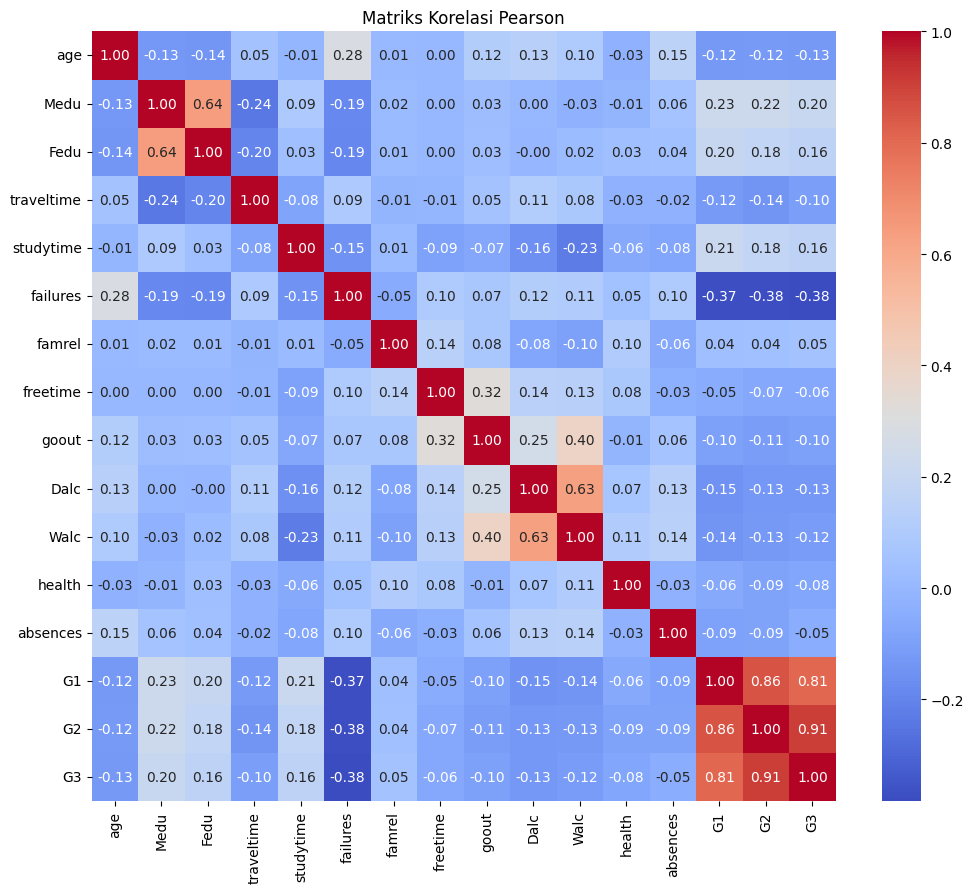

In [19]:
# Daftar kolom-kolom numerik yang akan diikutsertakan dalam analisis korelasi
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# Matriks korelasi Pearson
correlation_matrix = df[numerical_columns].corr()

# Buat heatmap untuk korelasi semua variabel numerik
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Pearson")
plt.show()

# 2. Pembangunan Model **Baseline**

Dilakukan pembangunan model baseine untuk melakukan regresi menggunakan neutron dengan menggunakan modul TensorFlow dan Keras. Model ini digunakan untuk memprediksi variabel target 'G3' (prediksi hasil ujian akhir siswa) berdasarkan fitur-fitur yang ada dalam DataFrame 'df'

a. Impor pustaka yang dibutuhkan

b. Membagi dataset menjadi train dan test

In [20]:
# DataFrame 'df' dengan fitur dan target
X = df.drop(columns=['G3'])
y = df['G3']

# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c. Bangun model baseline

In [21]:
model_baseline = Sequential()
model_baseline.add(Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model_baseline.add(Flatten())
model_baseline.add(Dense(64, activation='relu'))
model_baseline.add(Dense(1, activation='linear'))  # Untuk regresi gunakan aktivasi 'linear'

model_baseline.compile(optimizer='adam', loss='mean_squared_error')
model_baseline.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
21/21 [==============================] - 2s 23ms/step - loss: 56.0180 - val_loss: 27.4129
Epoch 2/50
21/21 [==============================] - 0s 8ms/step - loss: 16.5880 - val_loss: 12.8861
Epoch 3/50
21/21 [==============================] - 0s 8ms/step - loss: 9.3193 - val_loss: 8.7045
Epoch 4/50
21/21 [==============================] - 0s 8ms/step - loss: 6.8047 - val_loss: 6.5667
Epoch 5/50
21/21 [==============================] - 0s 10ms/step - loss: 5.5083 - val_loss: 5.3705
Epoch 6/50
21/21 [==============================] - 0s 8ms/step - loss: 4.6289 - val_loss: 4.7048
Epoch 7/50
21/21 [==============================] - 0s 8ms/step - loss: 4.1082 - val_loss: 4.1435
Epoch 8/50
21/21 [==============================] - 0s 7ms/step - loss: 3.7049 - val_loss: 3.9414
Epoch 9/50
21/21 [==============================] - 0s 8ms/step - loss: 3.3435 - val_loss: 3.5790
Epoch 10/50
21/21 [==============================] - 0s 9ms/step - loss: 3.1742 - val_loss: 3.4685
Epoch 11/50
2

'
d. Evaluasi model

In [22]:
# Evaluasi model pada data pengujian
loss = model_baseline.evaluate(X_test, y_test)

# Prediksi pada data pengujian
y_pred = model_baseline.predict(X_test)

# Menggunakan metrik evaluasi yang sesuai untuk regresi, misalnya, Mean Squared Error (MSE) dan Mean Absolute Error (MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_bs = mean_squared_error(y_test, y_pred)
mae_bs = mean_absolute_error(y_test, y_pred)

# Cetak hasil evaluasi
print(f'Mean Squared Error: {mse_bs}')
print(f'Mean Absolute Error: {mae_bs}')



7/7 [==============================] - 0s 2ms/step
Mean Squared Error: 3.0354106931367464
Mean Absolute Error: 1.1315308528368553


e. Visualisasi performa model

Epoch 1/50
21/21 [==============================] - 0s 7ms/step - loss: 1.7841 - val_loss: 2.2865
Epoch 2/50
21/21 [==============================] - 0s 6ms/step - loss: 1.7739 - val_loss: 2.2589
Epoch 3/50
21/21 [==============================] - 0s 6ms/step - loss: 1.7585 - val_loss: 2.2744
Epoch 4/50
21/21 [==============================] - 0s 6ms/step - loss: 1.7504 - val_loss: 2.2932
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 1.7595 - val_loss: 2.5198
Epoch 6/50
21/21 [==============================] - 0s 5ms/step - loss: 1.8732 - val_loss: 2.2613
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 1.8299 - val_loss: 2.3871
Epoch 8/50
21/21 [==============================] - 0s 5ms/step - loss: 1.8657 - val_loss: 2.3379
Epoch 9/50
21/21 [==============================] - 0s 5ms/step - loss: 1.7721 - val_loss: 2.2989
Epoch 10/50
21/21 [==============================] - 0s 6ms/step - loss: 1.7054 - val_loss: 2.3786
Epoch 11/50
21/21 [

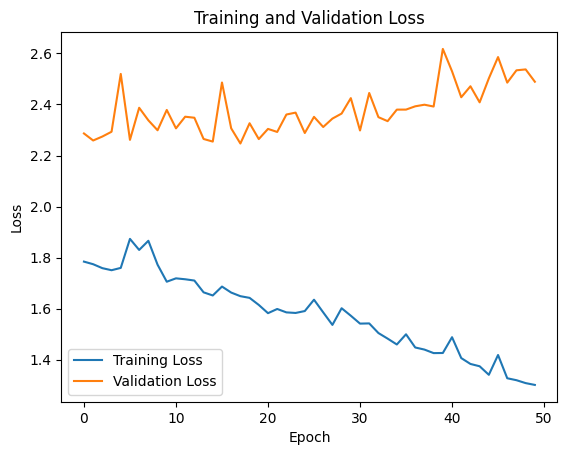

In [23]:
# Training model_baseline
history_baseline = model_baseline.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot loss selama pelatihan
plt.plot(history_baseline.history['loss'], label='Training Loss')
plt.plot(history_baseline.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


# 3. Eksplorasi Model


*   Skema 1: Tambahkan lebih banyak lapisan Conv1D.
*   Skema 2: Gunakan kernel size yang lebih besar.
*   Skema 3: Tambahkan lebih banyak neuron di lapisan Dense




kolom 'G3' dihapus dari X dan disimpan sebagai target prediksi y.

In [24]:
# Memuat dan memproses data
X = df.drop(columns=['G3'])
y = df['G3']

#standarisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Skema 1: Tambahkan lebih banyak lapisan Conv1D.**
* Lapisan Conv1D pertama mengekstrak 32 fitur dari data masukan menggunakan filter dengan ukuran kernel 2. Fungsi aktivasi ReLU memperkenalkan non-linieritas ke dalam jaringan, memungkinkannya untuk mempelajari pola kompleks.
* Lapisan Conv1D kedua mengekstrak lebih lanjut 64 fitur dari data menggunakan filter dengan ukuran kernel 2. Fungsi aktivasi ReLU terus memperkenalkan non-linieritas dan meningkatkan kemampuan jaringan untuk mempelajari pola kompleks.
* Lapisan Flatten meratakan output dari lapisan Conv1D menjadi vektor satu dimensi. Hal ini diperlukan sebelum memberi makan output ke lapisan terhubung penuh.
* Lapisan Dropout secara acak menghapus 20% neuron di lapisan sebelumnya selama pelatihan. Hal ini membantu mencegah overfitting dengan memaksa jaringan untuk mempelajari fitur yang lebih andal.
* Lapisan Dense pertama menghubungkan output ratakan ke 64 neuron terhubung penuh. Fungsi aktivasi ReLU terus memperkenalkan non-linieritas dan meningkatkan kemampuan jaringan untuk mempelajari hubungan kompleks.
* Lapisan Dense kedua menghubungkan lapisan sebelumnya ke satu neuron keluaran, bertanggung jawab untuk memprediksi nilai target.

In [25]:
from tensorflow.keras.layers import Dropout

model_1 = Sequential()

# Lapisan konvolusi dengan 32 filter, ukuran kernel 2, dan aktivasi ReLU
model_1.add(Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)))

# Lapisan ini mengekstrak fitur dari data masukan menggunakan 32 filter dengan ukuran kernel 2. Fungsi aktivasi ReLU memperkenalkan non-linieritas ke dalam jaringan, memungkinkannya untuk mempelajari pola kompleks.

# Lapisan konvolusi dengan 64 filter, ukuran kernel 2, dan aktivasi ReLU
model_1.add(Conv1D(64, 2, activation='relu'))

# Lapisan ini mengekstrak fitur lebih lanjut dari data menggunakan 64 filter dengan ukuran kernel 2. Fungsi aktivasi ReLU terus memperkenalkan non-linieritas dan meningkatkan kemampuan jaringan untuk mempelajari pola kompleks.

# Lapisan flatten
model_1.add(Flatten())

# Lapisan ini meratakan output dari lapisan konvolusi menjadi vektor satu dimensi. Hal ini diperlukan sebelum memberi makan output ke lapisan terhubung penuh.

# Lapisan dropout dengan tingkat dropout 0,2
model_1.add(Dropout(0.2))

# Lapisan ini secara acak menghapus 20% neuron di lapisan sebelumnya selama pelatihan. Hal ini membantu mencegah overfitting dengan memaksa jaringan untuk mempelajari fitur yang lebih andal.

# Lapisan dense dengan 64 unit dan aktivasi ReLU
model_1.add(Dense(64, activation='relu'))

# Lapisan ini menghubungkan output ratakan ke 64 neuron terhubung penuh. Fungsi aktivasi ReLU terus memperkenalkan non-linieritas dan meningkatkan kemampuan jaringan untuk mempelajari hubungan kompleks.

# Lapisan keluaran dense dengan 1 unit
model_1.add(Dense(1))

# Lapisan ini menghubungkan lapisan sebelumnya ke satu neuron keluaran, bertanggung jawab untuk memprediksi nilai target.

# Kompilasi model dengan pengoptimal Adam dan kehilangan kesalahan kuadrat rata-rata
model_1.compile(optimizer='adam', loss='mean_squared_error')


In [26]:
# Latih model_1
history_1 = model_1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluasi model_1
y_pred_1 = model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
mae_1 = mean_absolute_error(y_test, y_pred_1)
print(f"Mean Squared Error dari Model 1: {mse_1}")
print(f"Mean Absolute Error dari Model 1: {mae_1}")


7/7 [==============================] - 0s 4ms/step
Mean Squared Error dari Model 1: 2.0605046929445847
Mean Absolute Error dari Model 1: 0.9991899035764082


**Skema 2: Gunakan kernel size yang lebih besar**

Dalam kode ini, kita menggunakan tiga kernel size yang berbeda-beda, yaitu 3, 5, dan 7. Kernel size 3 akan menghasilkan fitur yang paling halus, kernel size 5 akan menghasilkan fitur yang lebih kasar, dan kernel size 7 akan menghasilkan fitur yang paling kasar.

Perbedaan kernel size ini dapat mempengaruhi akurasi dan kompleksitas model. Kernel size yang lebih kecil akan menghasilkan model yang lebih sederhana dan lebih akurat, sedangkan kernel size yang lebih besar akan menghasilkan model yang lebih kompleks dan lebih akurat.

In [27]:
# **Convolutional Neural Network dengan Kernel Size yang Berbeda**

model_2 = Sequential()

# Kernel size 3
model_2.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Kernel size 5
model_2.add(Conv1D(64, 5, activation='relu'))

# Kernel size 7
model_2.add(Conv1D(128, 7, activation='relu'))

# Flatten
model_2.add(Flatten())

# Dropout
model_2.add(Dropout(0.2))

# Dense
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(1))

# Compile
model_2.compile(optimizer='adam', loss='mean_squared_error')


In [28]:
# Latih model_2
history_2 = model_2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluasi model_2
y_pred_2 = model_2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred_2)
mae_2 = mean_absolute_error(y_test, y_pred_2)
print(f"Mean Squared Error dari Model 2: {mse_2}")
print(f"Mean Absolute Error dari Model 2: {mae_2}")

7/7 [==============================] - 0s 5ms/step
Mean Squared Error dari Model 2: 1.9044271288203534
Mean Absolute Error dari Model 2: 1.0097381003272305


**Skema 3: Tambahkan lebih banyak neuron di lapisan Dense**
Jumlah neuron di lapisan Dense ditingkatkan dari 32 menjadi 256.
Peningkatan jumlah neuron di lapisan Dense dapat meningkatkan kemampuan jaringan untuk mempelajari pola kompleks dalam data. Hal ini dapat meningkatkan kinerja prediksi model pada kumpulan data uji. Namun, penting untuk menyadari risiko overfitting. Menambahkan lebih banyak neuron dapat meningkatkan jumlah parameter dalam jaringan, yang dapat membuatnya lebih mungkin untuk overfitting data pelatihan dan tidak generalisasi dengan baik ke data baru.

In [29]:
model_3 = Sequential()
model_3.add(Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model_3.add(Flatten())
model_3.add(Dropout(0.2))

# menambahkan dari 32 ke 256
model_3.add(Dense(256, activation='relu'))

model_3.add(Dense(1))

model_3.compile(optimizer='adam', loss='mean_squared_error')


In [30]:
# Latih model_3
history_3 = model_3.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluasi model_3
y_pred_3 = model_3.predict(X_test)
mse_3 = mean_squared_error(y_test, y_pred_3)
mae_3 = mean_absolute_error(y_test, y_pred_3)
print(f"Mean Squared Error dari Model 3: {mse_3}")
print(f"Mean Absolute Error dari Model 3: {mae_3}")

7/7 [==============================] - 0s 4ms/step
Mean Squared Error dari Model 3: 2.0310190203961005
Mean Absolute Error dari Model 3: 0.9596571063881285


# 4. Evaluasi

In [31]:
# Membuat dictionary untuk menyimpan hasil evaluasi
dict_eval = {
    'Baseline Model': {'MSE': mse_bs, 'MAE': mae_bs},
    'Skema Model 1': {'MSE': mse_1, 'MAE': mae_1},
    'Skema Model 2': {'MSE': mse_2, 'MAE': mae_2},
    'Skema Model 3': {'MSE': mse_3, 'MAE': mae_3}
}

# Menampilkan dictionary hasil evaluasi
for model, metrics in dict_eval.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()


Baseline Model:
  MSE: 3.0354106931367464
  MAE: 1.1315308528368553

Skema Model 1:
  MSE: 2.0605046929445847
  MAE: 0.9991899035764082

Skema Model 2:
  MSE: 1.9044271288203534
  MAE: 1.0097381003272305

Skema Model 3:
  MSE: 2.0310190203961005
  MAE: 0.9596571063881285



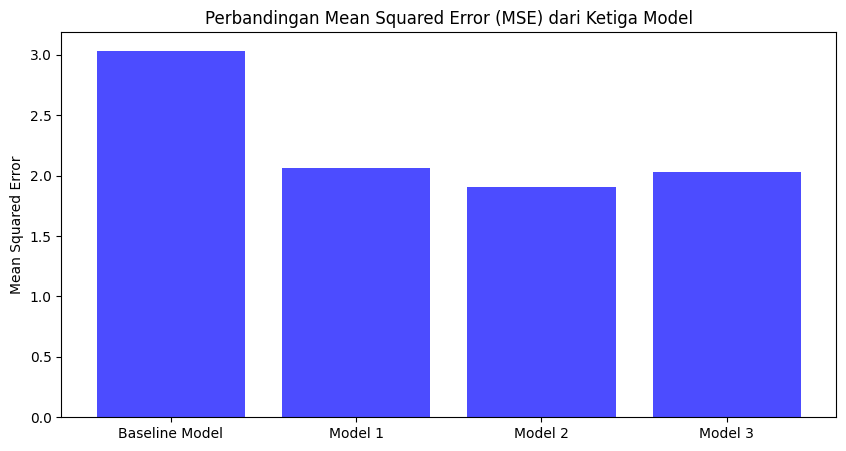

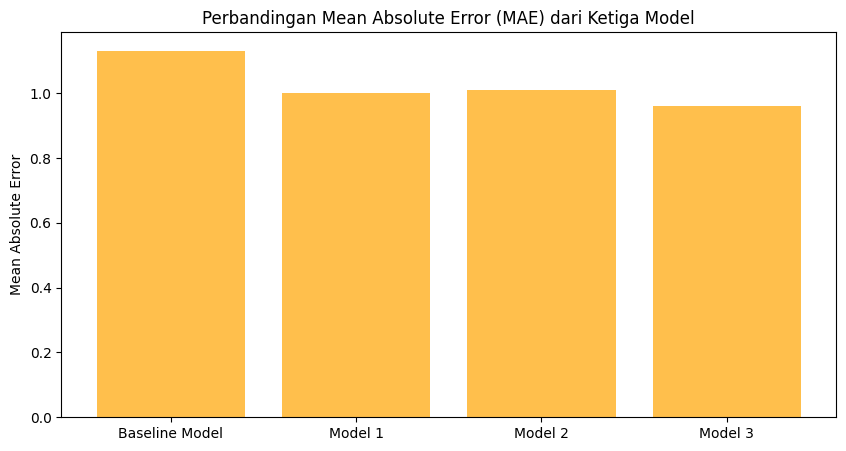

In [32]:
# Nilai MSE dan MAE dari ketiga model
mse_values = [mse_bs, mse_1, mse_2, mse_3]
mae_values = [mae_bs, mae_1, mae_2, mae_3]
labels = ['Baseline Model','Model 1', 'Model 2', 'Model 3']

# Membuat grafik batang untuk MSE
plt.figure(figsize=(10, 5))
plt.bar(labels, mse_values, color='blue', alpha=0.7, label='MSE')
plt.title('Perbandingan Mean Squared Error (MSE) dari Ketiga Model')
plt.ylabel('Mean Squared Error')
plt.show()

# Membuat grafik batang untuk MAE
plt.figure(figsize=(10, 5))
plt.bar(labels, mae_values, color='orange', alpha=0.7, label='MAE')
plt.title('Perbandingan Mean Absolute Error (MAE) dari Ketiga Model')
plt.ylabel('Mean Absolute Error')
plt.show()


In [35]:
print("\nHASIL DAN ANALISIS")
print("Dari hasil evaluasi ketiga model tersebut, yang diukur dengan Mean Squared Error (MSE) dan Mean Absolute Error (MAE), \ndapat disimpulkan beberapa poin penting:\n")

# Model Baseline
print("Model Baseline memiliki performa:")
print(f"MSE: {mse_bs}")
print(f"MAE: {mae_bs}")

# Model 1
print("\nModel 1 memiliki performa:")
print(f"MSE: {mse_1}")
print(f"MAE: {mae_1}")

# Model 2
print("\nModel 2 memiliki performa:")
print(f"MSE: {mse_2}")
print(f"MAE: {mae_2}")

# Model 3
print("\nModel 3 memilki performa:")
print(f"MSE: {mse_3}")
print(f"MAE: {mae_3}")

# Menentukan model terbaik
models = ['Baseline', 'Model 1', 'Model 2', 'Model 3']
mse_values = [mse_bs, mse_1, mse_2, mse_3]
mae_values = [mae_bs, mae_1, mae_2, mae_3]

best_model_index = min(range(len(mse_values)), key=lambda i: (mse_values[i], mae_values[i]))

print(f"\nModel terbaik berdasarkan MSE dan MAE adalah: {models[best_model_index]}")


HASIL DAN ANALISIS
Dari hasil evaluasi ketiga model tersebut, yang diukur dengan Mean Squared Error (MSE) dan Mean Absolute Error (MAE), 
dapat disimpulkan beberapa poin penting:

Model Baseline memiliki performa:
MSE: 3.0354106931367464
MAE: 1.1315308528368553

Model 1 memiliki performa:
MSE: 2.0605046929445847
MAE: 0.9991899035764082

Model 2 memiliki performa:
MSE: 1.9044271288203534
MAE: 1.0097381003272305

Model 3 memilki performa:
MSE: 2.0310190203961005
MAE: 0.9596571063881285

Model terbaik berdasarkan MSE dan MAE adalah: Model 2


In [44]:
# Menentukan model terbaik berdasarkan penjelasan tentang MSE dan MAE
best_model = None
lowest_mse = min(mse_bs, mse_1, mse_2, mse_3)
lowest_mae = min(mae_bs, mae_1, mae_2, mae_3)

if lowest_mse == mse_bs and lowest_mae == mae_bs:
    best_model = 'Baseline'
elif lowest_mse == mse_1 and lowest_mae == mae_1:
    best_model = 'Model 1'
elif lowest_mse == mse_2 and lowest_mae == mae_2:
    best_model = 'Model 2'
elif lowest_mse == mse_3 and lowest_mae == mae_3:
    best_model = 'Model 3'

# Menampilkan kesimpulan
print("ANALISIS")
print("MSE (Mean Squared Error) mengukur rata-rata kuadrat dari kesalahan. Nilai yang lebih rendah menunjukkan bahwa kesalahan \nantara nilai prediksi dan aktual lebih kecil. Model Baseline memiliki MSE tertinggi, menunjukkan \ntingkat kesalahan yang paling tinggi di antara semua model.\n")
print("MAE (Mean Absolute Error) mengukur rata-rata kesalahan absolut. Sama seperti MSE, nilai yang lebih rendah menunjukkan \nhasil yang lebih baik. Model Baseline juga memiliki MAE tertinggi, menunjukkan bahwa kesalahan \nprediksi pada umumnya lebih besar.\n")

print(f"Jadi model terbaik berdasarkan MSE dan MAE adalah: {models[best_model_index]}")
#print("Model Baseline, meskipun sederhana, memiliki kinerja yang lebih rendah dibandingkan dengan semua model lainnya.")


ANALISIS
MSE (Mean Squared Error) mengukur rata-rata kuadrat dari kesalahan. Nilai yang lebih rendah menunjukkan bahwa kesalahan 
antara nilai prediksi dan aktual lebih kecil. Model Baseline memiliki MSE tertinggi, menunjukkan 
tingkat kesalahan yang paling tinggi di antara semua model.

MAE (Mean Absolute Error) mengukur rata-rata kesalahan absolut. Sama seperti MSE, nilai yang lebih rendah menunjukkan 
hasil yang lebih baik. Model Baseline juga memiliki MAE tertinggi, menunjukkan bahwa kesalahan 
prediksi pada umumnya lebih besar.

Jadi model terbaik berdasarkan MSE dan MAE adalah: Model 2
